In [103]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

In [104]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [105]:
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

In [106]:
df_test=pd.read_csv("test.csv")

In [107]:
df_train=pd.read_csv("train.csv")

In [108]:
df_train.columns


Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [109]:
df_test.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [110]:
len(df_train)

27321

In [111]:
len(df_test)

11709

In [112]:
df_train.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [113]:
df_test.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [114]:
df_train.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,27321.000000,0.0,27321.0,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,2.732100e+04,...,27115.000000,27115.000000,27115.000000,27115.000000,27115.000000,27053.000000,27130.000000,27130.000000,27130.000000,27130.000000
mean,257331.996303,NaN,140.0,85.646426,28.271806,50081.999524,596.507668,37.508813,-91.288394,1.295106e+08,...,40.319803,40.355099,22.178745,544.238432,2208.761903,0.640434,0.508300,0.047537,0.019089,0.100248
std,21343.859725,NaN,0.0,98.333097,16.392846,29558.115660,232.497482,5.588268,16.343816,1.275531e+09,...,5.886317,8.039585,2.540257,283.546896,1089.316999,0.226640,0.136860,0.037640,0.020796,0.049055
min,220342.000000,NaN,140.0,1.000000,1.000000,602.000000,201.000000,17.929085,-165.453872,4.113400e+04,...,16.008330,13.250000,0.556780,0.664700,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238816.000000,NaN,140.0,29.000000,13.000000,26554.000000,405.000000,33.899064,-97.816067,1.799408e+06,...,36.892050,34.916670,21.312135,355.995825,1471.000000,0.502780,0.425102,0.020810,0.004530,0.065800
50%,257220.000000,NaN,140.0,63.000000,28.000000,47715.000000,614.000000,38.755183,-86.554374,4.866940e+06,...,40.373320,40.583330,22.514410,503.643890,2066.000000,0.690840,0.526665,0.038840,0.013460,0.095205
75%,275818.000000,NaN,140.0,109.000000,42.000000,77093.000000,801.000000,41.380606,-79.782503,3.359820e+07,...,43.567120,45.416670,23.575260,680.275055,2772.000000,0.817460,0.605760,0.065100,0.027487,0.129000
max,294334.000000,NaN,140.0,840.000000,72.000000,99925.000000,989.000000,67.074018,-65.379332,1.039510e+11,...,79.837390,82.250000,30.241270,6197.995200,27250.000000,1.000000,1.000000,0.714290,0.714290,1.000000


In [115]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [116]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

In [117]:
df_train.head(2)

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.0877
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.0903


In [118]:
df_test.head(2)

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377


In [119]:
#percentage of missing value in train dataset
missing_list_train=df_train.isnull().sum() *100/len(df_train)


In [120]:
# class pandas.DataFrame(data=None, index: Optional[Collection] = None, columns: Optional[Collection] =
# None, dtype: Union[str, numpy.dtype, ExtensionDtype, None] = None, copy: bool = False)
# Two-dimensional, size-mutable, potentially heterogeneous tabular data.

In [121]:
missing_values_df_train=pd.DataFrame(missing_list_train,columns=['Percentage of missing values'])
missing_values_df_train.sort_values(by=['Percentage of missing values'],inplace=True,ascending=False)
missing_values_df_train[missing_values_df_train['Percentage of missing values'] >0][:10]

,Percentage of missing values
BLOCKID,100.000000
hc_median,2.196113
hc_sample_weight,2.196113
hc_samples,2.196113
hc_stdev,2.196113
hc_mean,2.196113
hc_mortgage_stdev,2.097288
hc_mortgage_median,2.097288
hc_mortgage_mean,2.097288
hc_mortgage_sample_weight,2.097288


In [122]:
#BLOCKID can be dropped, since it is 100% missing values
print("BLOCKID can be dropped, since it is 100% missing values")

BLOCKID can be dropped, since it is 100% missing values


In [123]:
df_train .drop(columns=['BLOCKID','SUMLEVEL'],inplace=True) #SUMLEVEL doest not have any predictive power and no variance

In [124]:
df_test .drop(columns=['BLOCKID','SUMLEVEL'],inplace=True) #SUMLEVEL doest not have any predictive power

In [125]:
#Imputing missing values with mean
# Getting columns with missing values
missing_train_cols=[]
for col in df_train.columns:
# isna = Return a boolean same-sized object indicating if the values are NA. NA values,
# such as None or numpy.
# NaN, gets mapped to True values. Everything else gets mapped to False values.

# we can use the isna() function to mark all of the NaN values in the dataset as True
# and get a count of the missing values for each column.
    if df_train[col].isna().sum() !=0:
        missing_train_cols.append(col)
print(missing_train_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [126]:
# Getting columns with missing values
missing_test_cols=[]
for col in df_test.columns:
  if df_test[col].isna().sum() !=0:
   missing_test_cols.append(col)
print(missing_test_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [127]:
# Imputing missing values with mean
for col in df_train.columns:
    if col in (missing_train_cols):
       df_train[col].replace(np.nan, df_train[col].mean(),inplace=True)

In [128]:
# Imputing missing values with mean
for col in df_test.columns:
    if col in (missing_test_cols):
       df_test[col].replace(np.nan, df_test[col].mean(),inplace=True)

In [129]:
# Checking for columns with missing values
df_train.isna().sum().sum()

0

In [130]:
# Checking for columns with missing values
df_test.isna().sum().sum()

0

a) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above
10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [131]:
pip install -U pandasql

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pandasql in ./.local/lib/python3.7/site-packages (0.7.3)
Note: you may need to restart the kernel to use updated packages.


In [132]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [133]:
q1 = "select place,pct_own,second_mortgage,lat,lng from df_train where pct_own >0.10 and second_mortgage <0.5 order by second_mortgage DESC LIMIT 2500;"
df_train_location_mort_pct=pysqldf(q1)

In [134]:
df_train_location_mort_pct.head()

,place,pct_own,second_mortgage,lat,lng
0,Worcester City,0.20247,0.43363,42.254262,-71.800347
1,Harbor Hills,0.15618,0.31818,40.751809,-73.853582
2,Glen Burnie,0.22380,0.30212,39.127273,-76.635265
3,Egypt Lake-leto,0.11618,0.28972,28.029063,-82.495395
4,Lincolnwood,0.14228,0.28899,41.967289,-87.652434


In [135]:
import plotly.express as px
import plotly.graph_objects as go

In [136]:
fig = go.Figure(data=go.Scattergeo(
    lat = df_train_location_mort_pct['lat'],
    lon = df_train_location_mort_pct['lng']))
fig.update_layout(
    geo=dict(
       scope = 'north america',
       showland = True,
       landcolor = "rgb(212, 212, 212)",
       subunitcolor = "rgb(255, 255, 255)",
       countrycolor = "rgb(255, 255, 255)",
       showlakes = True,
       lakecolor = "rgb(255, 255, 255)",
       showsubunits = True,
       showcountries = True,
       resolution = 50,
       projection = dict(
          type = 'conic conformal',
          rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
         ),
         lataxis = dict (
             showgrid = True,
             gridwidth = 0.5,
             range= [ 20.0, 60.0 ],
             dtick = 5
         )
    ),
title='Top 2,500 locations with second mortgage is the highest and percent ownership is above 10 percent')
fig.show()
           

In [137]:
df_train['bad_debt']=df_train['second_mortgage']+df_train['home_equity']-df_train['home_equity_second_mortgage']

In [138]:
df_train['bad_debt']

0        0.09408
1        0.04274
2        0.09512
3        0.01086
4        0.05426
          ...   
27316    0.00000
27317    0.20908
27318    0.07857
27319    0.14305
27320    0.18362
Name: bad_debt, Length: 27321, dtype: float64

In [139]:
df_train['bins'] = pd.cut(df_train['bad_debt'],bins=[0,0.49,1], labels=["less than 50%","50-100%"])

In [140]:
df_train.groupby(['bins']).size()

bins
less than 50%    25864
50-100%             28
dtype: int64

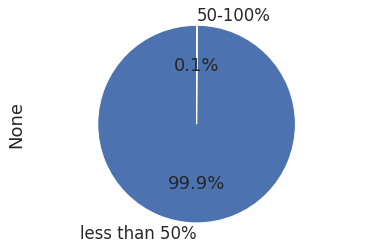

In [141]:
df_train.groupby(['bins']).size().plot(kind='pie',subplots=True,startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [143]:
df_train["debt"].loc[20342]

0.8657299999999999

In [144]:
df_train["bad_debt"].loc[20342]

0.19181

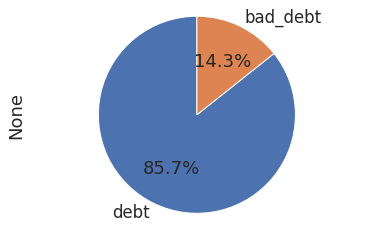

In [145]:
df_train["debt"].to_frame().join(df_train["bad_debt"].to_frame()).sum().plot(kind='pie',subplots=True,startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [147]:
cols=[]
df_train.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_

In [148]:
#Taking Hamilton and Manhattan cities data
cols=['second_mortgage','home_equity','debt','bad_debt']
# df.loc = Access a group of rows and columns by label(s) or a boolean array.
# Access group of values using labels.
df_box_hamilton=df_train.loc[df_train['city'] == 'Hamilton']
df_box_manhattan=df_train.loc[df_train['city'] == 'Manhattan']
# Manhattan concatinate under Hamilton
df_box_city=pd.concat([df_box_hamilton,df_box_manhattan], keys=['Hamilton', 'Manhattan'])
df_box_city.head(4)

UID  COUNTYID  STATEID        state state_ab      city  \
Hamilton 0     267822        53       36     New York       NY  Hamilton   
         391   263797        21       34   New Jersey       NJ  Hamilton   
         1378  270979        17       39         Ohio       OH  Hamilton   
         1406  259028        95       28  Mississippi       MS  Hamilton   

                       place     type primary  zip_code  ...  \
Hamilton 0          Hamilton     City   tract     13346  ...   
         391       Yardville     City   tract      8610  ...   
         1378  Hamilton City  Village   tract     45015  ...   
         1406       Hamilton      CDP   tract     39746  ...   

               female_age_stdev  female_age_sample_weight  female_age_samples  \
Hamilton 0             22.51276                 685.33845              2618.0   
         391           24.05831                 732.58443              3124.0   
         1378          22.66500                 565.32725              2528.0   
         1406          22.79602                 483.01311              1954.0   

               pct_own  married  married_snp  separated  divorced  bad_debt  \
Hamilton 0     0.79046  0.57851      0.01882    0.01240   0.08770   0.09408   
         391   0.64400  0.56377      0.01980    0.00990   0.04892   0.18071   
         1378  0.61278  0.47397      0.04419    0.02663   0.13741   0.15005   
         1406  0.83241  0.58678      0.01052    0.00000   0.11721   0.02130   

                        bins  
Hamilton 0     less than 50%  
         391   less than 50%  
         1378  less than 50%  
         1406  less than 50%  

[4 rows x 80 columns]

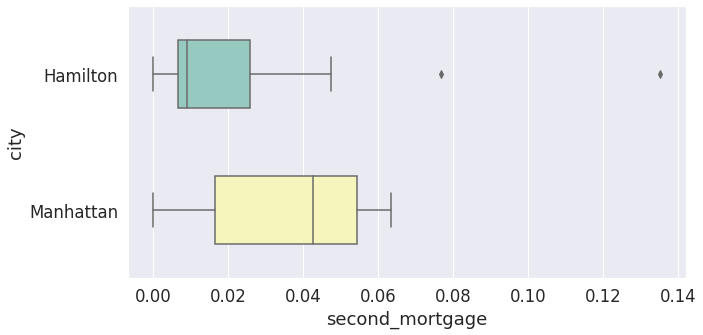

The median for Second Mortgage is far less of Hamilton as compared with Manhattan


In [149]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='second_mortgage', y='city',width=0.5,palette="Set3")
plt.show()
print("The median for Second Mortgage is far less of Hamilton as compared with Manhattan")

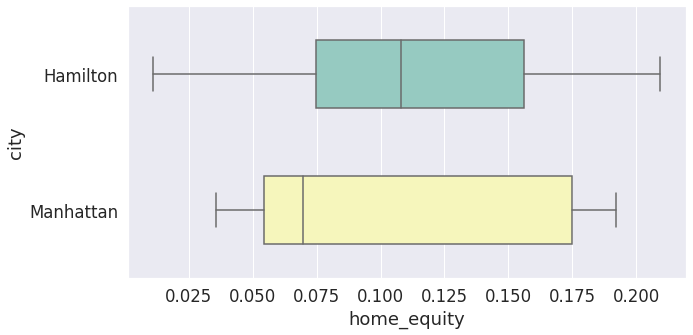

The median for Home Equity is less of Manhattan as compared with Hamilton


In [150]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='home_equity', y='city',width=0.5,palette="Set3")
plt.show()
print("The median for Home Equity is less of Manhattan as compared with Hamilton")

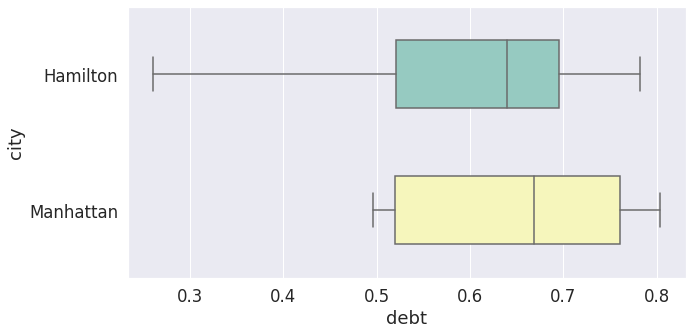

The median for Debt for both cities stand between 60 to 70%


In [151]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='debt', y='city',width=0.5,palette="Set3")
plt.show()
print("The median for Debt for both cities stand between 60 to 70%")

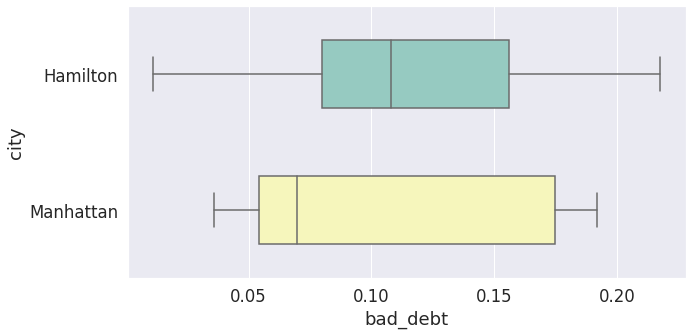

The median for bad debt is lower, or under 10%, for Manhattan as compared with Hamilton


In [152]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='bad_debt', y='city',width=0.5,palette="Set3")
plt.show()
print("The median for bad debt is lower, or under 10%, for Manhattan as compared with Hamilton")

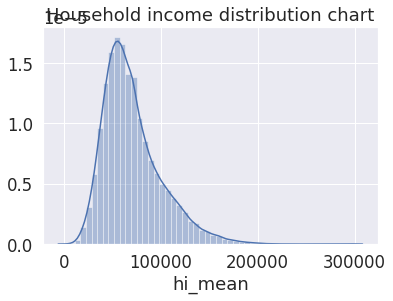

In [153]:
sns.distplot(df_train['hi_mean'])
plt.title('Household income distribution chart')
plt.show()

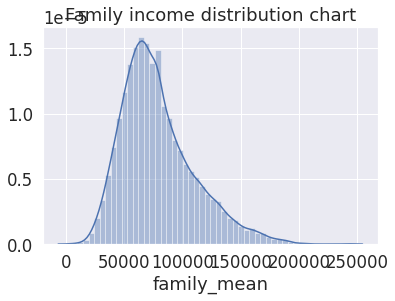

In [154]:
sns.distplot(df_train['family_mean'])
plt.title('Family income distribution chart')
plt.show()

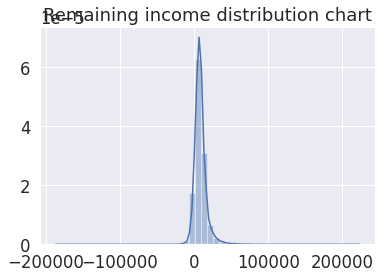

In [155]:
sns.distplot(df_train['family_mean']-df_train['hi_mean'])
plt.title('Remaining income distribution chart')
plt.show()

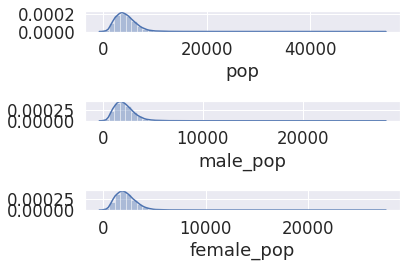

In [156]:
#plt.figure(figsize=(25,10))
fig,(ax1,ax2,ax3)=plt.subplots(3,1)
sns.distplot(df_train['pop'],ax=ax1)
sns.distplot(df_train['male_pop'],ax=ax2)
sns.distplot(df_train['female_pop'],ax=ax3)
plt.subplots_adjust(wspace=0.8,hspace=0.8)
plt.tight_layout()
plt.show()

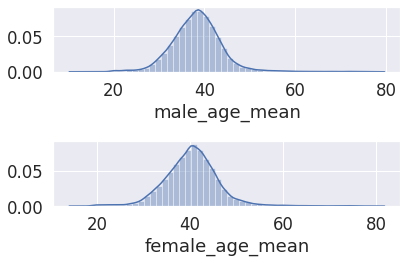

In [157]:
#plt.figure(figsize=(25,10))
fig,(ax1,ax2)=plt.subplots(2,1)
sns.distplot(df_train['male_age_mean'],ax=ax1)
sns.distplot(df_train['female_age_mean'],ax=ax2)
plt.subplots_adjust(wspace=0.8,hspace=0.8)
plt.tight_layout()
plt.show()

In [158]:
df_train['pop_density']=df_train['pop']/df_train['ALand']

In [159]:
df_test['pop_density']=df_test['pop']/df_test['ALand']

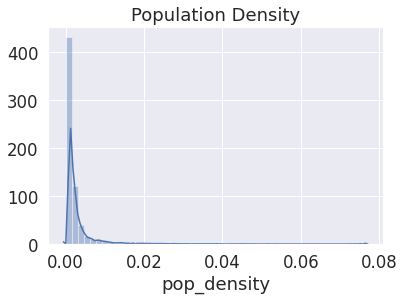

In [160]:
sns.distplot(df_train['pop_density'])
plt.title('Population Density')
plt.show() # Very less density is noticed

In [161]:
df_train['age_median']=(df_train['male_age_median']+df_train['female_age_median'])/2
df_test['age_median']=(df_test['male_age_median']+df_test['female_age_median'])/2

In [162]:
df_train[['male_age_median','female_age_median','male_pop','female_pop','age_median']].head()

,male_age_median,female_age_median,male_pop,female_pop,age_median
0,44.00000,45.33333,2612,2618,44.666665
1,32.00000,37.58333,1349,1284,34.791665
2,40.83333,42.83333,3643,3238,41.833330
3,48.91667,50.58333,1141,1559,49.750000
4,22.41667,21.58333,2586,3051,22.000000


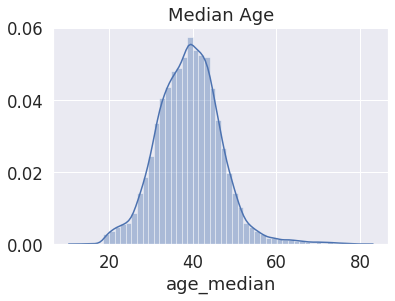

In [163]:
sns.distplot(df_train['age_median'])
plt.title('Median Age')
plt.show()

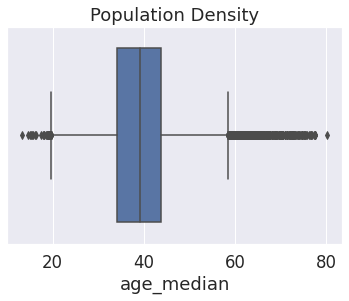

In [164]:
sns.boxplot(df_train['age_median'])
plt.title('Population Density')
plt.show()

In [165]:
df_train['pop'].describe()

count    27321.000000
mean      4316.032685
std       2169.226173
min          0.000000
25%       2885.000000
50%       4042.000000
75%       5430.000000
max      53812.000000
Name: pop, dtype: float64

In [166]:
df_train['pop_bins']=pd.cut(df_train['pop'],bins=5,labels=['very low','low','medium','high','very high'])

In [167]:
df_train[['pop','pop_bins']]

,pop,pop_bins
0,5230,very low
1,2633,very low
2,6881,very low
3,2700,very low
4,5637,very low
...,...,...
27316,1847,very low
27317,4155,very low
27318,2829,very low
27319,11542,low


In [168]:
df_train['pop_bins'].value_counts()

very low     27058
low            246
medium           9
high             7
very high        1
Name: pop_bins, dtype: int64

In [169]:
df_train.groupby(by='pop_bins')[['married','separated','divorced']].count()

,married,separated,divorced
pop_bins,,,
very low,27058,27058,27058
low,246,246,246
medium,9,9,9
high,7,7,7
very high,1,1,1


In [170]:
df_train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean", "median"])

married           separated            divorced          
               mean    median      mean    median      mean    median
pop_bins                                                             
very low   0.507548  0.524680  0.019126  0.013650  0.100504  0.096020
low        0.584894  0.593135  0.015833  0.011195  0.075348  0.070045
medium     0.655737  0.618710  0.005003  0.004120  0.065927  0.064890
high       0.503359  0.335660  0.008141  0.002500  0.039030  0.010320
very high  0.734740  0.734740  0.004050  0.004050  0.030360  0.030360

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning:

FixedFormatter should only be used together with FixedLocator



<Figure size 720x360 with 0 Axes>

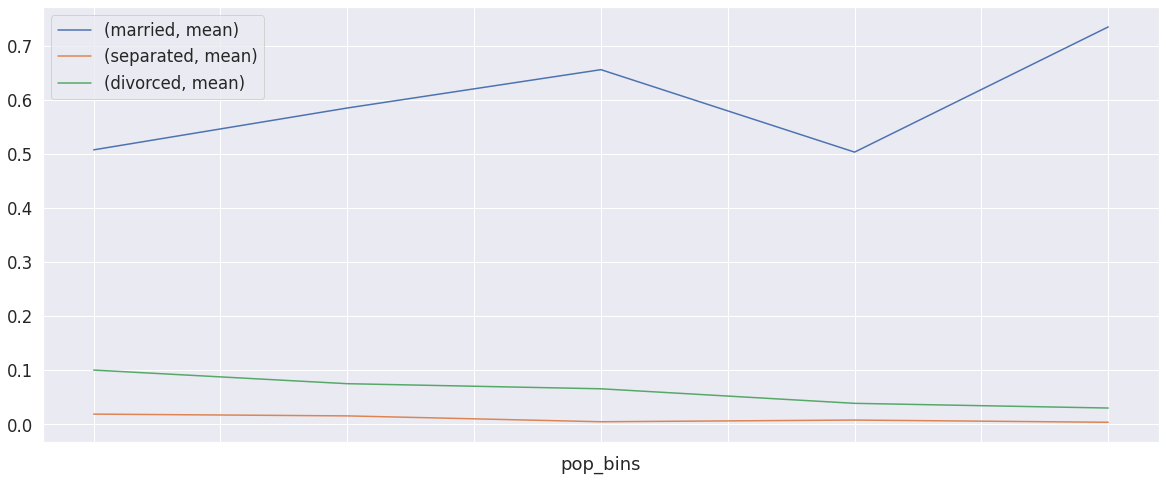

In [171]:
plt.figure(figsize=(10,5))
pop_bin_married=df_train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
pop_bin_married.plot(figsize=(20,8))
plt.legend(loc='best')
plt.show()

In [172]:
rent_state_mean=df_train.groupby(by='state')['rent_mean'].agg(["mean"])
rent_state_mean.head()

,mean
state,
Alabama,774.004927
Alaska,1185.763570
Arizona,1097.753511
Arkansas,720.918575
California,1471.133857


In [173]:
income_state_mean=df_train.groupby(by='state')['family_mean'].agg(["mean"])
income_state_mean.head()

,mean
state,
Alabama,67030.064213
Alaska,92136.545109
Arizona,73328.238798
Arkansas,64765.377850
California,87655.470820


In [174]:
rent_perc_of_income=rent_state_mean['mean']/income_state_mean['mean']
rent_perc_of_income.head(10)

state
Alabama                 0.011547
Alaska                  0.012870
Arizona                 0.014970
Arkansas                0.011131
California              0.016783
Colorado                0.013529
Connecticut             0.012637
Delaware                0.012929
District of Columbia    0.013198
Florida                 0.015772
Name: mean, dtype: float64

In [175]:
#overall level rent as a percentage of income
sum(df_train['rent_mean'])/sum(df_train['family_mean'])

0.013358170721473864

In [176]:
df_train.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_

In [177]:
df_train.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_

In [178]:
cor=df_train[['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
'second_mortgage', 'home_equity', 'debt','hs_degree',
'age_median','pct_own', 'married','separated', 'divorced']].corr()

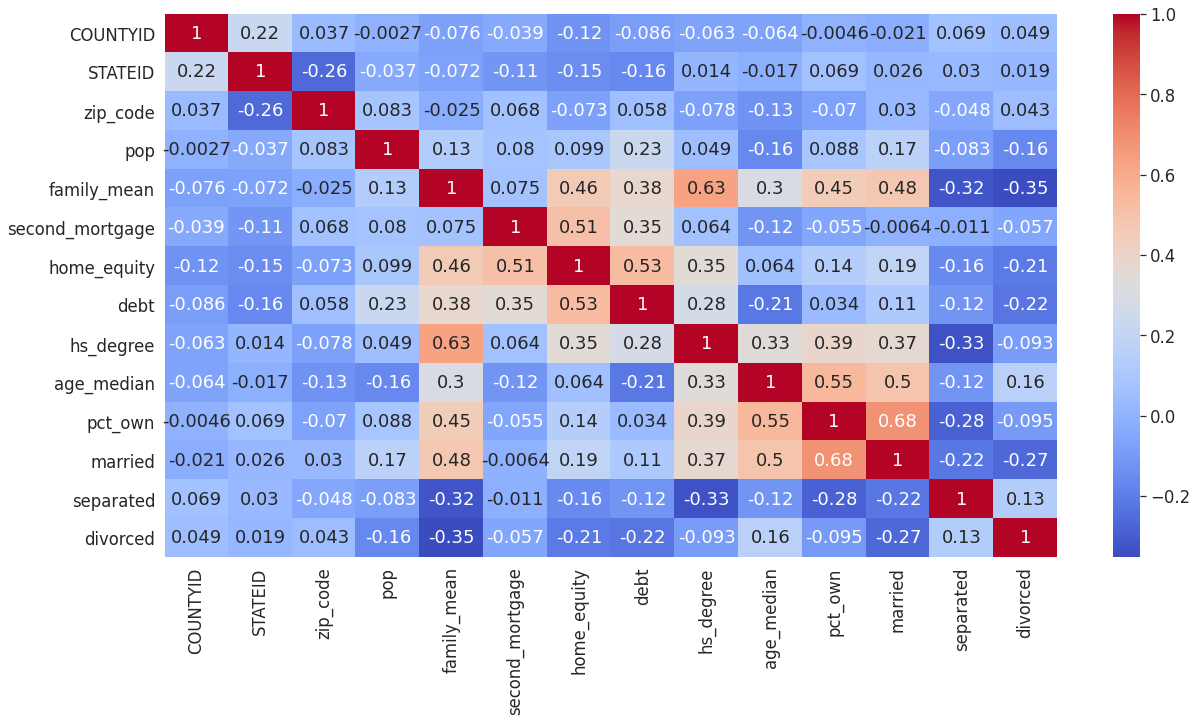

In [179]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [180]:
!pip install -U factor_analyzer

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 40 kB 548 kB/s eta 0:00:011
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40380 sha256=cbee34303d16e01859fe912a0223b867c23ad29b4d3e2b55bda692434005255b
  Stored in directory: /home/labsuser/.cache/pip/wheels/8d/9e/4c/fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer


In [181]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [182]:
fa=FactorAnalyzer(n_factors=5)
fa.fit_transform(df_train.select_dtypes(exclude= ('object','category')))
fa.loadings_

array([[-0.0792116 ,  0.01842369, -0.00226994, -0.20615039,  0.1225752 ],
       [-0.10984742,  0.02069069, -0.02864267, -0.07473645,  0.04769891],
       [-0.10239309,  0.01738258,  0.01114894, -0.19315079,  0.1354283 ],
       [-0.08622374,  0.0503972 , -0.12586023, -0.03474272, -0.11990473],
       [ 0.01793293,  0.01939809,  0.0050148 ,  0.02432589, -0.00404004],
       [ 0.09338585, -0.09600445, -0.06490774, -0.14554335, -0.14514436],
       [-0.00633166, -0.03983021,  0.13510122, -0.00869713,  0.12448944],
       [-0.04107781, -0.02151263,  0.03726748, -0.08926393,  0.05508894],
       [-0.00171758, -0.01561247, -0.00212012, -0.0419514 ,  0.02096203],
       [ 0.08106245,  0.95705902, -0.08717159, -0.00931178, -0.04671674],
       [ 0.0760883 ,  0.91836256, -0.1085829 , -0.03001101, -0.04734036],
       [ 0.082143  ,  0.94745462, -0.06115377,  0.01212778, -0.04428319],
       [ 0.76885593,  0.00988416, -0.03762533,  0.11742661, -0.12008072],
       [ 0.71734362,  0.00632598, -0.0

In [183]:
df_train.columns

Index(['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place',
       'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_

In [184]:
df_train['type'].unique()
type_dict={'type':{'City':1,
'Urban':2,
'Town':3,
'CDP':4,
'Village':5,
'Borough':6}
}
df_train.replace(type_dict,inplace=True)

In [185]:
df_train['type'].unique()

array([1, 2, 3, 4, 5, 6])

In [186]:
df_test.replace(type_dict,inplace=True)

In [187]:
df_test['type'].unique()

array([4, 1, 6, 3, 5, 2])

In [189]:
feature_cols=['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
'second_mortgage', 'home_equity', 'debt','hs_degree',
'age_median','pct_own', 'married','separated', 'divorced']
x_train=df_train[feature_cols]
y_train=df_train['hc_mortgage_mean']
x_test=df_test[feature_cols]
y_test=df_test['hc_mortgage_mean']
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score

In [190]:
x_train.head()

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,age_median,pct_own,married,separated,divorced
0,53,36,13346,1,5230,67994.14790,0.02077,0.08919,0.52963,0.89288,44.666665,0.79046,0.57851,0.01240,0.08770
1,141,18,46616,1,2633,50670.10337,0.02222,0.04274,0.60855,0.90487,34.791665,0.52483,0.34886,0.01426,0.09030
2,63,18,46122,1,6881,95262.51431,0.00000,0.09512,0.73484,0.94288,41.833330,0.85331,0.64745,0.01607,0.10657
3,127,72,927,2,2700,56401.68133,0.01086,0.01086,0.52714,0.91500,49.750000,0.65037,0.47257,0.02021,0.10106
4,161,20,66502,1,5637,54053.42396,0.05426,0.05426,0.51938,1.00000,22.000000,0.13046,0.12356,0.00000,0.03109


In [191]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [192]:
linereg=LinearRegression()
linereg.fit(x_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [193]:
y_pred=linereg.predict(x_test_scaled)

In [194]:
print("Overall R2 score of linear regression model", r2_score(y_test,y_pred))
print("Overall RMSE of linear regression model", np.sqrt(mean_squared_error(y_test,y_pred)))

Overall R2 score of linear regression model 0.7348210754610929
Overall RMSE of linear regression model 323.1018894984635


In [195]:
state=df_train['STATEID'].unique()
state[0:5]
#Picking a few iDs 20,1,45,6

array([36, 18, 72, 20,  1])

In [197]:
for i in [20,1,45]:
    print("State ID-",i)
    x_train_nation=df_train[df_train['COUNTYID']==i][feature_cols]
    y_train_nation=df_train[df_train['COUNTYID']==i]['hc_mortgage_mean']
    x_test_nation=df_test[df_test['COUNTYID']==i][feature_cols]
    y_test_nation=df_test[df_test['COUNTYID']==i]['hc_mortgage_mean']
    x_train_scaled_nation=sc.fit_transform(x_train_nation)
    x_test_scaled_nation=sc.fit_transform(x_test_nation)
    linereg.fit(x_train_scaled_nation,y_train_nation)
    y_pred_nation=linereg.predict(x_test_scaled_nation)
    print("Overall R2 score of linear regression model for state,",i,":-" ,r2_score(y_test_nation,y_pred_nation))
    print("Overall RMSE of linear regression model for state,",i,":-" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")

State ID- 20
Overall R2 score of linear regression model for state, 20 :- 0.6046603766461813
Overall RMSE of linear regression model for state, 20 :- 307.97188999314704


State ID- 1
Overall R2 score of linear regression model for state, 1 :- 0.8104382475484617
Overall RMSE of linear regression model for state, 1 :- 307.8275861848434


State ID- 45
Overall R2 score of linear regression model for state, 45 :- 0.7887446497855253
Overall RMSE of linear regression model for state, 45 :- 225.69615420724125




In [198]:
residuals=y_test-y_pred
residuals

0        281.969088
1        -69.935775
2        190.761969
3       -157.290627
4         -9.887017
            ...    
11704    -67.541646
11705    -41.578757
11706   -127.427569
11707   -330.820475
11708    217.760642
Name: hc_mortgage_mean, Length: 11709, dtype: float64

(array([6.000e+00, 3.000e+00, 2.900e+01, 7.670e+02, 7.823e+03, 2.716e+03,
        3.010e+02, 4.900e+01, 1.200e+01, 3.000e+00]),
 array([-2515.04284233, -1982.92661329, -1450.81038425,  -918.69415521,
         -386.57792617,   145.53830287,   677.65453191,  1209.77076095,
         1741.88698999,  2274.00321903,  2806.11944807]),
 <BarContainer object of 10 artists>)

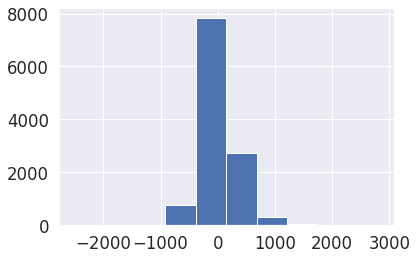

In [199]:
plt.hist(residuals)

<AxesSubplot:xlabel='hc_mortgage_mean'>

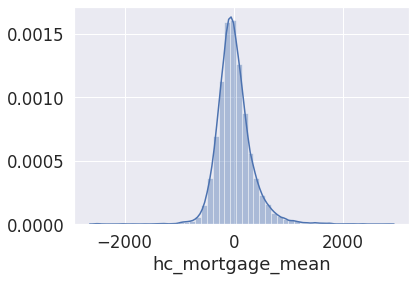

In [200]:
sns.distplot(residuals)

In [ ]:
plt.scatter(residuals,y_pred) # Same variance and residuals does not have correlation with predictor